In [1]:
import warnings
warnings.simplefilter("ignore", UserWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [2]:
# Load the final scores data
data = pd.read_csv("data/final_scores.csv")

# Sort data by Final Score for better visualization
data = data.sort_values(by="Final Score", ascending=False)

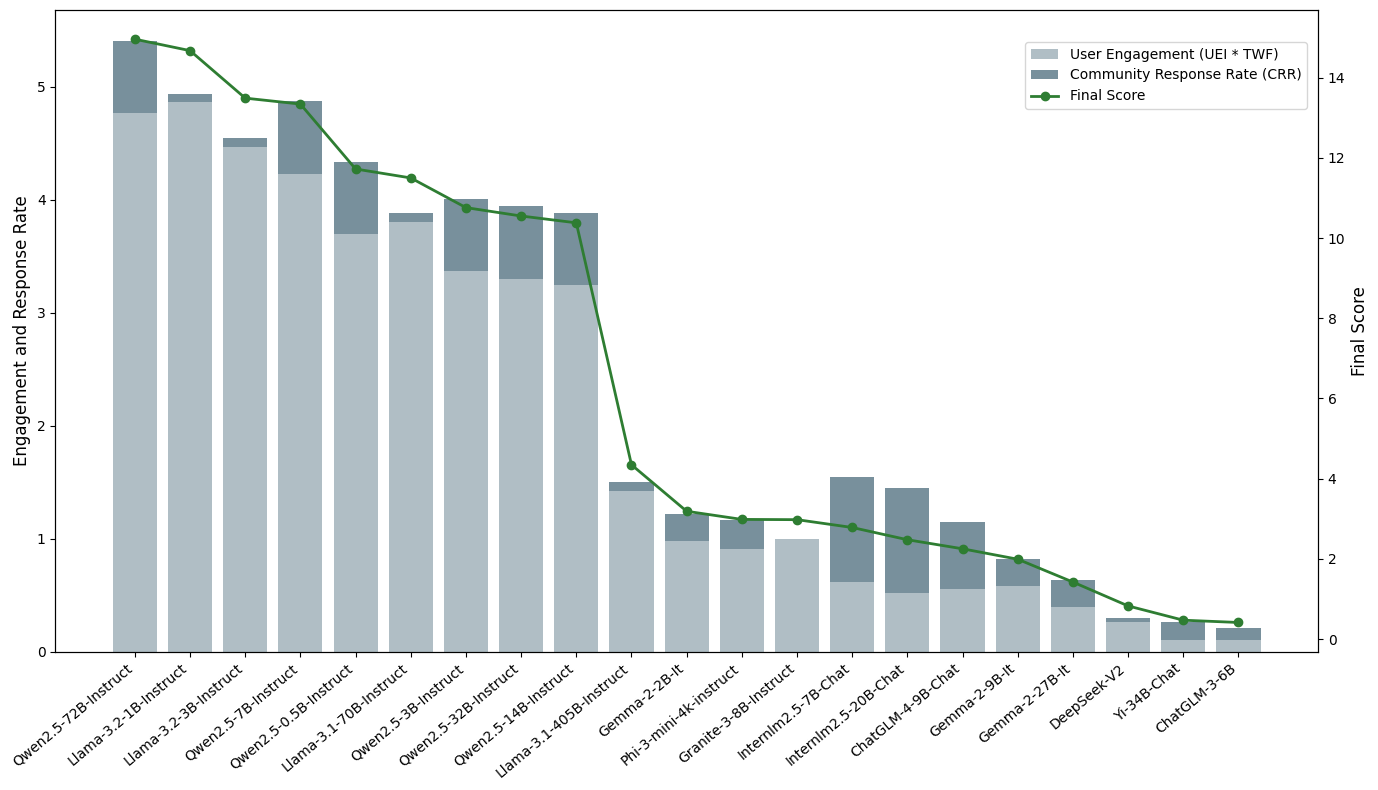

In [3]:
# Initialize the figure and first axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plots on the left y-axis with muted colors
ax1.bar(data["Model Name"], data["UEI"] * data["TWF"], label="User Engagement (UEI * TWF)", color='#B0BEC5')  # Light grey-blue
ax1.bar(data["Model Name"], data["CRR"], label="Community Response Rate (CRR)", 
        bottom=data["UEI"] * data["TWF"], color='#78909C')  # Dark grey-blue
ax1.set_ylabel("Engagement and Response Rate", fontsize=12)
ax1.tick_params(axis='y')

# Secondary axis for the line plot
ax2 = ax1.twinx()
ax2.plot(data["Model Name"], data["Final Score"], marker='o', color='#2E7D32', label="Final Score", linewidth=2)  # Muted dark green
ax2.set_ylabel("Final Score", fontsize=12)
ax2.tick_params(axis='y')

# Customize x-axis
ax1.set_xticklabels(data["Model Name"], rotation=40, ha='right')

# Position the legend for clarity
fig.legend(loc="upper right", bbox_to_anchor=(0.95, 0.95), fontsize=10)

# Tight layout for neatness
fig.tight_layout()

# Save
plt.savefig("fig1.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

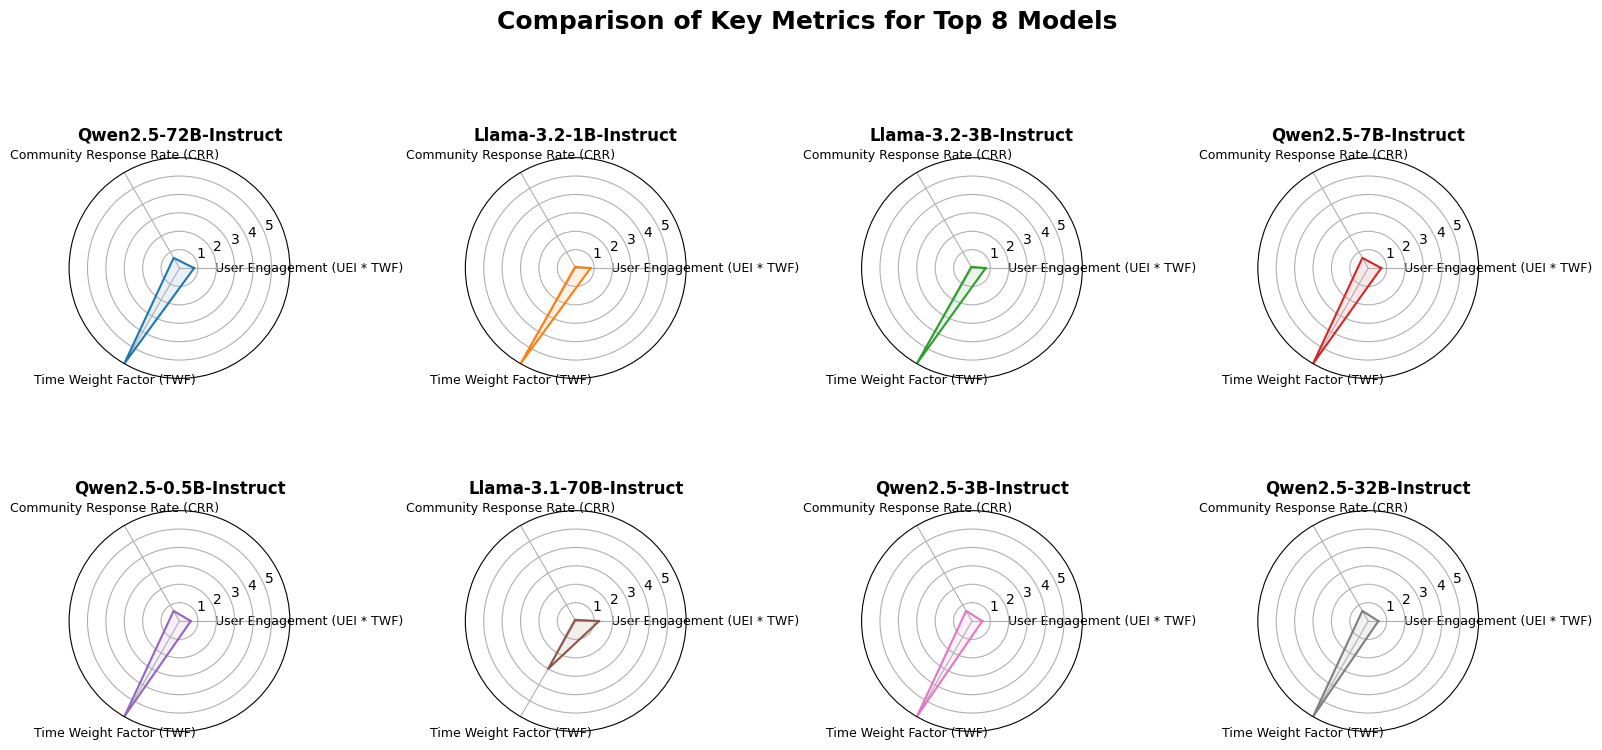

In [ ]:
labels = ["User Engagement (UEI * TWF)", "Community Response Rate (CRR)", "Time Weight Factor (TWF)"]
num_vars = len(labels)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

top_8_data = data[:8]

num_models = len(top_8_data["Model Name"].unique())
num_cols = 4
num_rows = (num_models // num_cols) + (num_models % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4), subplot_kw=dict(polar=True))
axes = axes.flatten()

max_value = top_8_data[["UEI", "CRR", "TWF"]].values.max()

colors = plt.cm.tab10.colors
for i, model_name in enumerate(top_8_data["Model Name"].unique()):
    ax = axes[i]
    values = top_8_data[top_8_data["Model Name"] == model_name][["UEI", "CRR", "TWF"]].values.flatten()
    values = np.append(values, values[0])

    ax.plot(angles, values, linewidth=1.5, linestyle='solid', color=colors[i % len(colors)])
    ax.fill(angles, values, color=colors[i % len(colors)], alpha=0.1)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_ylim(0, max_value)
    ax.set_title(model_name, fontsize=12, weight='bold')
    ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("fig2.png", dpi=300, bbox_inches="tight")
plt.show()